ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: edge_color [renderer: GlyphRenderer(id='fab2050c-d9fb-45ad-8849-6da87d6abf17', ...)]


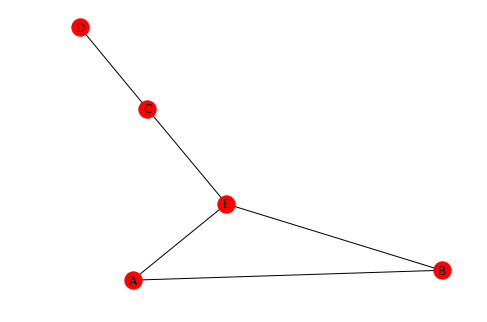

In [80]:
import networkx as nx
from bokeh.io import show, output_file
from bokeh.plotting import figure,show
from bokeh.models.graphs import from_networkx #I haven't been able to use this!
from bokeh.io import output_notebook, export_png
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.resources import CDN
from bokeh.embed import file_html
from math import sqrt
import csv
from csv import reader

all_nodes = []
with open('graph.csv', 'r', encoding='utf-8-sig') as f:
    # no need for `list` here
    rows = csv.reader(f, delimiter=',')
    for row in rows:
        unique_row_items = set(field.strip().upper() for field in row)
        for item in unique_row_items:
            if item not in result:
                all_nodes.append(item)

with open('graph.csv', 'r', encoding='utf-8-sig') as read_obj:
    csv_reader = reader(read_obj)
    all_edges = list(map(tuple, csv_reader))

G = nx.Graph()
G.add_nodes_from(result,color= 'green')  
#G.add_nodes_from(Dataset2,color='blue') 
G.add_edges_from(all_edges,weight=0.8)
layout = nx.draw_spring(G, with_labels=True)
nx.write_graphml(G,"TEST.graphML")
network = nx.read_graphml("TEST.graphML")

#start Bokeh code
layout = nx.spring_layout(network,k=1.1/sqrt(network.number_of_nodes()),iterations=100) #pass the NX file to a spring layout

nodes, nodes_coordinates = zip(*sorted(layout.items()))
nodes_xs, nodes_ys = list(zip(*nodes_coordinates))
nodes_source = ColumnDataSource(dict(x=nodes_xs, y=nodes_ys,name=nodes)) #Can this pass the color? 

hover = HoverTool(tooltips=[('name', '@name')]) #would like to know how to add in more values here manually

plot = figure(plot_width=800, plot_height=400,tools=['tap', hover, 'box_zoom', 'reset'])

r_circles = plot.circle('x', 'y', source=nodes_source, size=10, color='orange', level = 'overlay')#this function sets the color of the nodes, but how to set based on the name of the node? 


def get_edges_specs(_network, _layout): 
    d = dict(xs=[], ys=[], alphas=[])
    weights = [d['weight'] for u, v, d in _network.edges(data=True)]
    max_weight = max(weights)
    calc_alpha = lambda h: 0.1 + 0.6 * (h / max_weight)

    # example: { ..., ('user47', 'da_bjoerni', {'weight': 3}), ... }
    for u, v, data in _network.edges(data=True):
        d['xs'].append([_layout[u][0], _layout[v][0]])
        d['ys'].append([_layout[u][1], _layout[v][1]])
        d['alphas'].append(calc_alpha(data['weight']))
    return d

lines_source = ColumnDataSource(get_edges_specs(network, layout))

r_lines = plot.multi_line('xs', 'ys', line_width=1.5,
                      alpha='alphas', color='navy',
                      source=lines_source)#This function sets the color of the edges

show(plot)
#export_png(plot, filename="plot.png")

['b', 'a', 'e', 'c', 'd']
